<a href="https://colab.research.google.com/github/mimomaina/Global_wheat_detection/blob/main/Global_wheat__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rwairimumaina","key":"899593e0145c1a6491c5d8b9c8992be7"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c global-wheat-detection


 98% 593M/607M [00:04<00:00, 136MB/s]
100% 607M/607M [00:04<00:00, 144MB/s]


In [ ]:
!unzip global-wheat-detection.zip -d global-wheat-detection

Archive:  global-wheat-detection.zip
  inflating: global-wheat-detection/sample_submission.csv  
  inflating: global-wheat-detection/test/2fd875eaa.jpg  
  inflating: global-wheat-detection/test/348a992bb.jpg  
  inflating: global-wheat-detection/test/51b3e36ab.jpg  
  inflating: global-wheat-detection/test/51f1be19e.jpg  
  inflating: global-wheat-detection/test/53f253011.jpg  
  inflating: global-wheat-detection/test/796707dd7.jpg  
  inflating: global-wheat-detection/test/aac893a91.jpg  
  inflating: global-wheat-detection/test/cb8d261a3.jpg  
  inflating: global-wheat-detection/test/cc3532ff6.jpg  
  inflating: global-wheat-detection/test/f5a1f0358.jpg  
  inflating: global-wheat-detection/train.csv  
  inflating: global-wheat-detection/train/00333207f.jpg  
  inflating: global-wheat-detection/train/005b0d8bb.jpg  
  inflating: global-wheat-detection/train/006a994f7.jpg  
  inflating: global-wheat-detection/train/00764ad5d.jpg  
  inflating: global-wheat-detection/train/00b5c6764.j

In [ ]:
# Check the dataset files
data_path = "global-wheat-detection"
os.listdir(data_path)

['test', 'train', 'sample_submission.csv', 'train.csv']

In [ ]:
# Load the annotations file
df = pd.read_csv(os.path.join(data_path, "train.csv"))
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


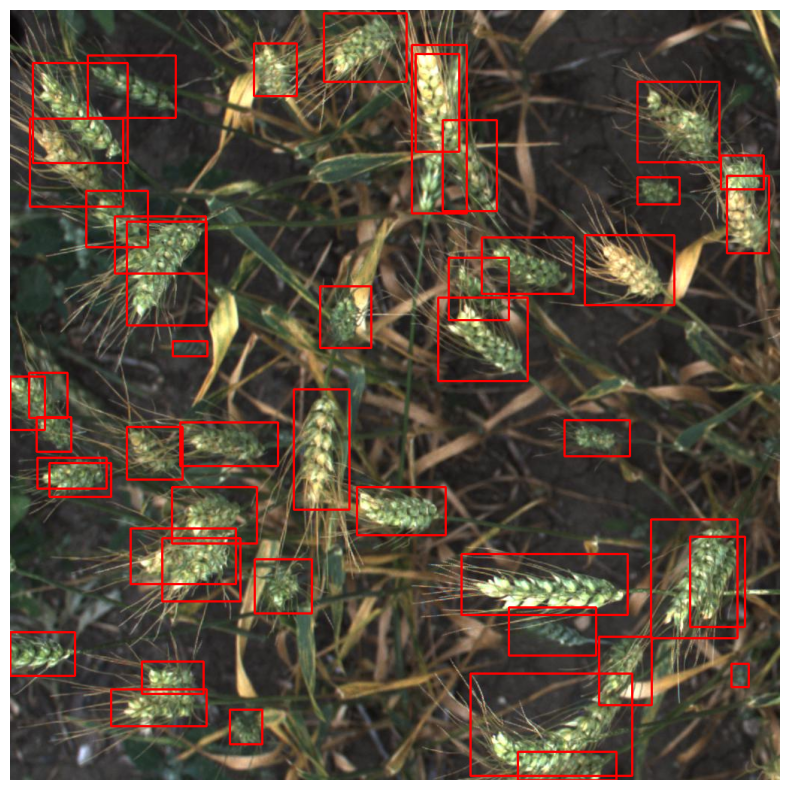

In [ ]:
import cv2
import matplotlib.pyplot as plt
import ast

def plot_image_with_boxes(image_id):
    img_path = os.path.join(data_path, "train", image_id + ".jpg")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    bboxes = df[df["image_id"] == image_id]["bbox"].values
    for bbox in bboxes:
        bbox = ast.literal_eval(bbox)  # Convert string to list
        x, y, w, h = bbox
        cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Display a sample image
plot_image_with_boxes(df["image_id"].iloc[0])


In [ ]:
#Convert bounding box format
def convert_bbox(bbox):
    """Convert [x, y, w, h] to [x_min, y_min, x_max, y_max]."""
    x, y, w, h = bbox
    return [x, y, x + w, y + h]

df["bbox"] = df["bbox"].apply(lambda x: convert_bbox(ast.literal_eval(x)))
df.head()


,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 890.0, 258.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 356.0, 606.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 451.0, 664.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 943.0, 202.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 150.0, 261.0]",usask_1


In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the classifier for one class (wheat)
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)




/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 139MB/s]


In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class WheatDataset(Dataset):
    def __init__(self, dataframe, image_dir, transforms=None):
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, idx):
        record = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, record["image_id"] + ".jpg")
        img = Image.open(img_path).convert("RGB")

        # Get bounding boxes
        target = {}
        target["boxes"] = torch.as_tensor([record["bbox"]], dtype=torch.float32)
        target["labels"] = torch.ones((1,), dtype=torch.int64)

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.df)

# Create dataset and dataloader
dataset = WheatDataset(df, os.path.join(data_path, "train"))
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))


In [ ]:
import torchvision.transforms as transforms

# Define a transformation to convert PIL images to PyTorch tensors
transform = transforms.Compose([
    transforms.ToTensor()  # Converts PIL image to Tensor
])

def train_one_epoch(model, dataloader, device):
    model.train()
    for images, targets in dataloader:
        # Convert images to tensors before sending to device
        images = [transform(img).to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward + backward pass
        optimizer.zero_grad()
        outputs = model(images, targets)
        loss = sum(loss for loss in outputs.values())
        loss.backward()
        optimizer.step()


model.eval()
image, _ = dataset[0]
with torch.no_grad():
    pred = model([image.to(device)])

print(pred)  # View predictions


In [ ]:
# Set the model to evaluation mode
model.eval()

# Get the first image from the dataset
image, _ = dataset[0]  # This is a PIL Image

# Convert the PIL image to a tensor
image = transform(image)

# Make prediction
with torch.no_grad():
    pred = model([image])

print(pred)


[{'boxes': tensor([[1.0088e+03, 0.0000e+00, 1.0240e+03, 2.5296e+01],
        [9.9522e+02, 9.5223e+02, 1.0240e+03, 1.0240e+03],
        [8.5265e+01, 9.7017e+02, 1.2009e+02, 1.0073e+03],
        [9.8965e+02, 8.7192e+02, 1.0240e+03, 1.0240e+03],
        [9.9313e+02, 3.5996e-01, 1.0240e+03, 6.2501e+01],
        [9.9084e+02, 5.8847e+02, 1.0240e+03, 7.6626e+02],
        [5.2251e+02, 7.4771e+02, 6.7053e+02, 9.0639e+02],
        [9.5259e+02, 8.5992e+02, 1.0240e+03, 1.0240e+03],
        [9.5990e+02, 4.7657e+02, 1.0240e+03, 9.3235e+02],
        [2.1366e+02, 9.4190e+02, 3.0100e+02, 1.0173e+03],
        [0.0000e+00, 9.3589e+02, 7.9426e+01, 1.0216e+03],
        [6.3312e+01, 9.5327e+02, 1.7282e+02, 1.0132e+03],
        [9.9417e+02, 2.8862e+01, 1.0239e+03, 1.9681e+02],
        [9.6464e-01, 2.4486e+02, 7.3650e+01, 3.2262e+02],
        [0.0000e+00, 2.7222e+02, 7.6310e+01, 3.4718e+02],
        [8.3767e+01, 9.6154e+02, 1.4091e+02, 1.0073e+03],
        [8.8758e+02, 5.1303e+02, 9.7789e+02, 5.9964e+02],
   

In [ ]:
import torch
import torchvision.transforms as transforms

# Define transformation to convert PIL image to Tensor
transform = transforms.ToTensor()

# Get the first image from the dataset
image, _ = dataset[0]

# Convert PIL image to a PyTorch tensor
image = transform(image)  # Now it's a tensor


# Make prediction
with torch.no_grad():
    pred = model([image])

print(pred)  # View predictions


[{'boxes': tensor([[1.0088e+03, 0.0000e+00, 1.0240e+03, 2.5296e+01],
        [9.9522e+02, 9.5223e+02, 1.0240e+03, 1.0240e+03],
        [8.5265e+01, 9.7017e+02, 1.2009e+02, 1.0073e+03],
        [9.8965e+02, 8.7192e+02, 1.0240e+03, 1.0240e+03],
        [9.9313e+02, 3.5996e-01, 1.0240e+03, 6.2501e+01],
        [9.9084e+02, 5.8847e+02, 1.0240e+03, 7.6626e+02],
        [5.2251e+02, 7.4771e+02, 6.7053e+02, 9.0639e+02],
        [9.5259e+02, 8.5992e+02, 1.0240e+03, 1.0240e+03],
        [9.5990e+02, 4.7657e+02, 1.0240e+03, 9.3235e+02],
        [2.1366e+02, 9.4190e+02, 3.0100e+02, 1.0173e+03],
        [0.0000e+00, 9.3589e+02, 7.9426e+01, 1.0216e+03],
        [6.3312e+01, 9.5327e+02, 1.7282e+02, 1.0132e+03],
        [9.9417e+02, 2.8862e+01, 1.0239e+03, 1.9681e+02],
        [9.6464e-01, 2.4486e+02, 7.3650e+01, 3.2262e+02],
        [0.0000e+00, 2.7222e+02, 7.6310e+01, 3.4718e+02],
        [8.3767e+01, 9.6154e+02, 1.4091e+02, 1.0073e+03],
        [8.8758e+02, 5.1303e+02, 9.7789e+02, 5.9964e+02],
   

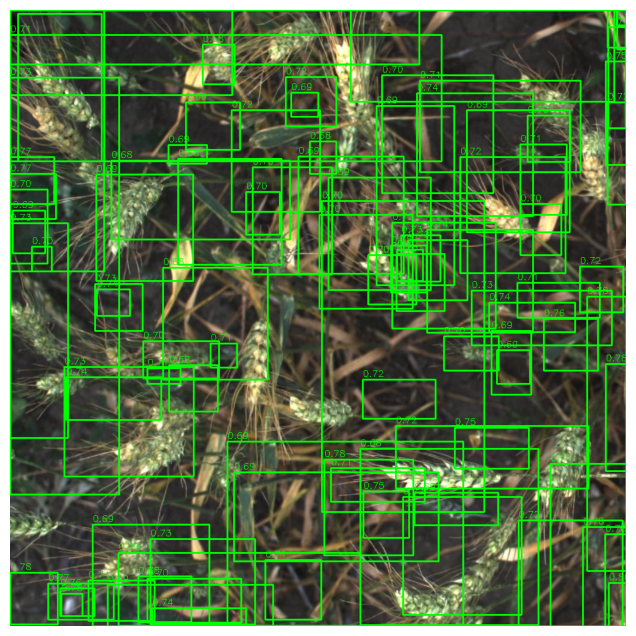

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import cv2

def plot_image_with_boxes(image, predictions, threshold=0.5):
    """
    Displays an image with predicted bounding boxes.

    Args:
    - image: The original image.
    - predictions: Model predictions containing 'boxes' and 'scores'.
    - threshold: Confidence score threshold to filter weak predictions.
    """
    # Convert image to numpy and ensure correct color format
    image = F.to_pil_image(image)  # Convert tensor to PIL image
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Extract predictions
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Filter out low-confidence predictions
    for i, box in enumerate(boxes):
        if scores[i] >= threshold:
            x1, y1, x2, y2 = box.astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{scores[i]:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Display image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

plot_image_with_boxes(image, pred)


Multiple bounding boxes are stacked on top of each other, likely indicating duplicate detections for the same wheat head.

some wheat heads are not detected, the model might need further fine-tuning or more training data.

In [ ]:
import torch

# Define a threshold for confidence scores
confidence_threshold = 0.8
iou_threshold = 0.3

# Extract boxes, scores, and labels from the predictions
boxes = pred[0]['boxes']
scores = pred[0]['scores']

# Apply NMS
keep_indices = torch.ops.torchvision.nms(boxes, scores, iou_threshold)
filtered_boxes = boxes[keep_indices]
filtered_scores = scores[keep_indices]

# Filter out low-confidence predictions
final_boxes = filtered_boxes[filtered_scores > confidence_threshold]
final_scores = filtered_scores[filtered_scores > confidence_threshold]

print(f"Number of final detections: {len(final_boxes)}")


Number of final detections: 2


NMS helps in selecting the most relevant detections by removing overlapping bounding boxes and keeping only the highest-confidence ones.

From the above code, we have increased the precision by increasing the confidence threshold(remove uncertain detections) and maintaining a iou threshold of 0.3(allow more overlapping boxes to be retained).

In [ ]:
# Print confidence scores
print("Confidence scores of detections:")
for score in final_scores:
    print(score.item())


Confidence scores of detections:
0.8389154076576233
0.8038431406021118


The above confidence score is high (high confidence in the prediction)meaning the model is quite certain about the outcome.

In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!git config --global user.name "mimomaina"
!git config --global user.email "ruthmaina067@gmail.com"


In [ ]:
!git clone https://github.com/mimomaina/Global_wheat_detection.git


Cloning into 'Global_wheat_detection'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [ ]:
!cp /content/Global wheat detection.ipynb /content/Global_wheat_detection//


cp: cannot stat '/content/Global': No such file or directory
cp: cannot stat 'wheat': No such file or directory
cp: cannot stat 'detection.ipynb': No such file or directory


In [ ]:
!cd /content/Global_wheat_detection/ && git add . && git commit -m "Add updated notebook" && git push origin main


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
